<a href="https://colab.research.google.com/github/sastha-06/ML/blob/main/24BAD106_ML_EX2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SCENARIO_1

   Cst_Cnt  Btl_Cnt       Sta_ID                                Depth_ID  \
0        1        1  054.0 056.0  19-4903CR-HY-060-0930-05400560-0000A-3   
1        1        2  054.0 056.0  19-4903CR-HY-060-0930-05400560-0008A-3   
2        1        3  054.0 056.0  19-4903CR-HY-060-0930-05400560-0010A-7   
3        1        4  054.0 056.0  19-4903CR-HY-060-0930-05400560-0019A-3   
4        1        5  054.0 056.0  19-4903CR-HY-060-0930-05400560-0020A-7   

   Depthm  T_degC  Salnty  O2ml_L  STheta  O2Sat  ...  R_PHAEO  R_PRES  \
0       0   10.50  33.440     NaN  25.649    NaN  ...      NaN       0   
1       8   10.46  33.440     NaN  25.656    NaN  ...      NaN       8   
2      10   10.46  33.437     NaN  25.654    NaN  ...      NaN      10   
3      19   10.45  33.420     NaN  25.643    NaN  ...      NaN      19   
4      20   10.45  33.421     NaN  25.643    NaN  ...      NaN      20   

   R_SAMP  DIC1  DIC2  TA1  TA2  pH2  pH1  DIC Quality Comment  
0     NaN   NaN   NaN  NaN  NaN  

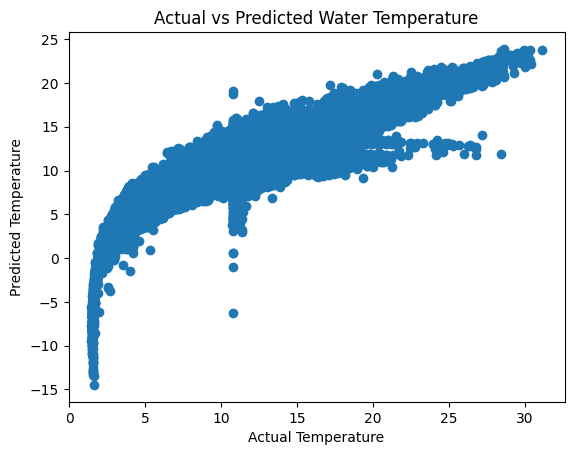

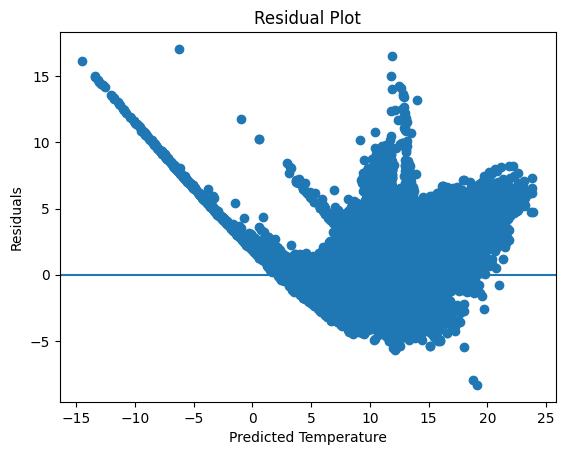


Ridge Regression R2: 0.8453204299186163
Lasso Regression R2: 0.8445822812209466

Feature Importance:
  Feature  Coefficient
0  Depthm    -1.490570
1  Salnty     1.180011
2  O2ml_L     1.724279
3  STheta    -1.985566


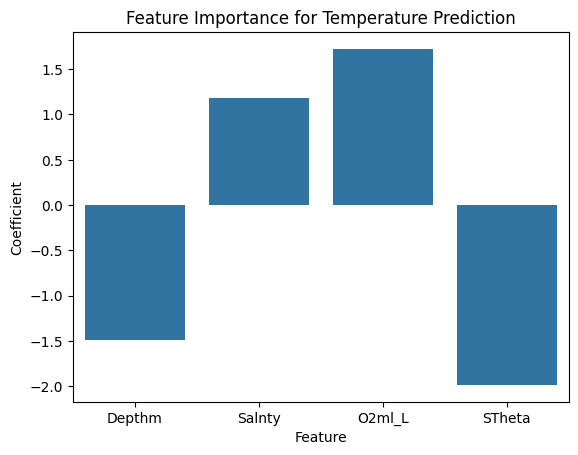

In [7]:
#from google.colab import files
#uploaded=files.upload()
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv("bottle.csv (1).zip",low_memory=False)   # Kaggle CalCOFI file name is usually bottle.csv
print(df.head())
print(df.columns)
#  Select Features & Target
features = ['Depthm', 'Salnty', 'O2ml_L', 'STheta']
target = 'T_degC'

df = df[features + [target]]

# Handle Missing Values
df = df.fillna(df.mean())

# Split Input & Output

X = df[features]
y = df[target]


#  Feature Scaling

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Train-Test Split

X_train, X_test, y_train, y_test = train_test_split( X_scaled, y, test_size=0.2, random_state=42)

# Train Linear Regression Model

lr = LinearRegression()
lr.fit(X_train, y_train)

#  Prediction

y_pred = lr.predict(X_test)


#  Evaluation

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Performance")
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)


#  Visualization: Actual vs Predicted

plt.figure()
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Temperature")
plt.ylabel("Predicted Temperature")
plt.title("Actual vs Predicted Water Temperature")
plt.show()

# Visualization: Residuals
residuals = y_test - y_pred

plt.figure()
plt.scatter(y_pred, residuals)
plt.axhline(y=0)
plt.xlabel("Predicted Temperature")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

# Regularization - Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

print("\nRidge Regression R2:", r2_score(y_test, y_pred_ridge))

#Regularization - Lasso
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

print("Lasso Regression R2:", r2_score(y_test, y_pred_lasso))


# Feature Importance (Coefficients)
coef_df = pd.DataFrame({'Feature': features,'Coefficient': lr.coef_})

print("\nFeature Importance:")
print(coef_df)

plt.figure()
sns.barplot(x='Feature', y='Coefficient', data=coef_df)
plt.title("Feature Importance for Temperature Prediction")
plt.show()


SCENARIO_2

                        date    open    high    low   close    volume
0  2022-05-17 09:35:00+05:30  872.00  872.00  872.0  872.00   3759243
1  2022-05-17 09:45:00+05:30  872.00  872.00  872.0  872.00         0
2  2022-05-17 09:55:00+05:30  872.00  918.10  862.0  902.80  12449251
3  2022-05-17 10:05:00+05:30  902.45  908.95  896.0  902.15   5237329
4  2022-05-17 10:15:00+05:30  902.30  905.00  900.0  903.85   1820317
Index(['date', 'open', 'high', 'low', 'close', 'volume'], dtype='object')

--- Logistic Regression Performance ---
Accuracy : 0.5888738127544098
Precision: 1.0
Recall   : 0.013029315960912053
F1-Score : 0.02572347266881029


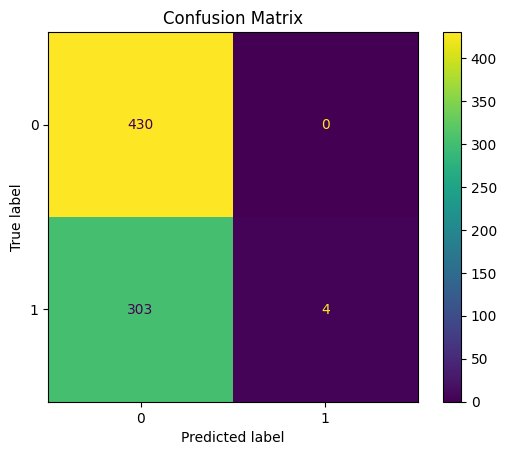

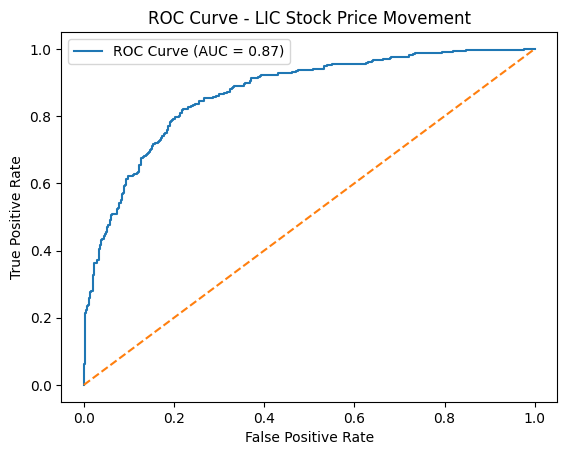

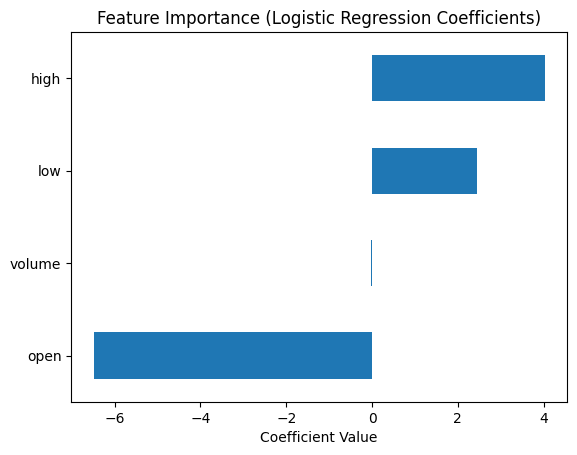


Best Parameters: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}

--- Tuned Model Performance ---
Accuracy : 0.6974219810040706
Precision: 0.9375
Recall   : 0.2931596091205212
F1-Score : 0.4466501240694789

--- L1 Regularized Model Performance ---
F1-Score: 0.7298747763864043


In [ ]:
#from google.colab import files
#uploaded=files.upload()

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc)

df = pd.read_csv("LICI - 10 minute data.csv")
print("SASTHA JEYASRI A\n24BAD106")
print(df.head())
print(df.columns)

# 3. Create Binary Target Variable (Price Movement)
# Price_Movement = 1 if Close > Open else 0

df['Price_Movement'] = (df['close'] > df['open']).astype(int)

df.fillna(df.mean(numeric_only=True), inplace=True)

# 5. Select Input Features and Target

features = ['open', 'high', 'low', 'volume']
X = df[features]
y = df['Price_Movement']

# 6. Feature Scaling

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 7. Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# 8. Train Logistic Regression Model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# 9. Predict Stock Movement
y_pred = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:, 1]  # probabilities for ROC curve

# 10. Evaluation Metrics

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\n--- Logistic Regression Performance ---")
print("Accuracy :", accuracy)
print("Precision:", precision)
print("Recall   :", recall)
print("F1-Score :", f1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.show()

# 11. ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - LIC Stock Price Movement")
plt.legend()
plt.show()

# 12. Feature Importance (Logistic Coefficients)
importance = pd.Series(log_reg.coef_[0], index=features).sort_values()

plt.figure()
importance.plot(kind='barh')
plt.title("Feature Importance (Logistic Regression Coefficients)")
plt.xlabel("Coefficient Value")
plt.show()

# 13. Hyperparameter Tuning (C, Penalty)
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs']
}

grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='f1')
grid.fit(X_train, y_train)

print("\nBest Parameters:", grid.best_params_)

best_model = grid.best_estimator_
best_pred = best_model.predict(X_test)

print("\n--- Tuned Model Performance ---")
print("Accuracy :", accuracy_score(y_test, best_pred))
print("Precision:", precision_score(y_test, best_pred))
print("Recall   :", recall_score(y_test, best_pred))
print("F1-Score :", f1_score(y_test, best_pred))

# 14. Regularization (L1)
log_reg_l1 = LogisticRegression(penalty='l1', C=1.0, solver='liblinear', max_iter=1000)
log_reg_l1.fit(X_train, y_train)
l1_pred = log_reg_l1.predict(X_test)

print("\n--- L1 Regularized Model Performance ---")
print("F1-Score:", f1_score(y_test, l1_pred))

